In [1]:
import numpy as np

# 황금 분할 탐색법

In [2]:
# Algorithm 3.1 : p.36

def bracket_minimum(f,x,s=1E-2,k=2.0):
    a,ya=x,f(x)
    b,yb=a+s,f(a+s)
    
    print('init: (a:%.4f, b:%.4f) (ya:%.4f yb:%.4f)' %(a,b,ya,yb))
    
    if yb>ya:
        a,b=b,a
        ya,yb=yb,ya
        s=-s
        
    while True:
        c,yc=b+s, f(b+s)
        print('step: (a:%.4f, b:%.4f, c:%.4f) (ya:%.4f, yb:%.4f yc:%.4f)' %(a,b,c,ya,yb,yc))
        
        if yc>yb:
            return (a,c) if a<c else (c,a)
        
        else:
            a,ya,b,yb=b,yb,c,yc
            s*=k
            
            
# 구현된 알고리즘을 이용해서 그 안의 feasible set을 이용해 a,b결정하면 
# 그 안에 최소값이 있으니 goldent section search method를 이용해 최소값 찾음

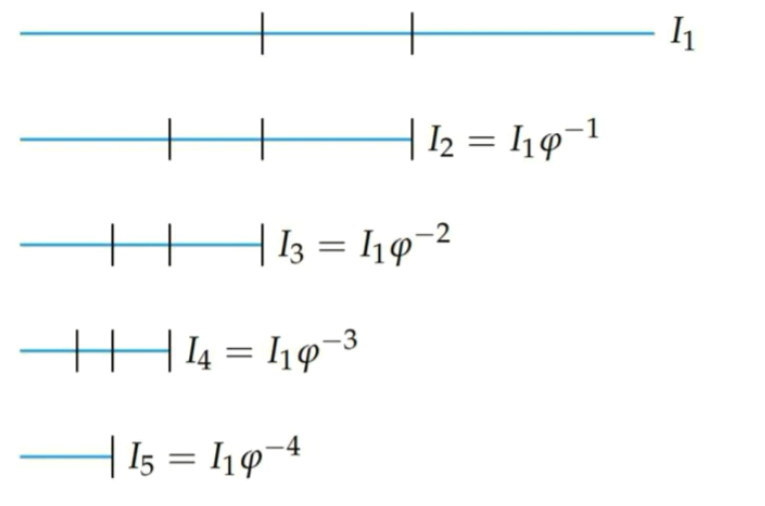

In [3]:
from IPython.display import Image
Image('golden_section.png',width=640)

In [4]:
# Algorithm 3.3 : p.41

def golden_section_search(f,x,epsilon=1E-6): 
    # f는 목적함수, x는 bracket minimum에 의해 feasible set을 찾기 위한 초기값, epsilon은 허용오차
    
    a,b=bracket_minimum(f,x)
    print('init:(a:%.4f, b:%.4f)' %(a,b))
    
    distance=abs(a-b)
    
    psi=0.5*(1.+np.sqrt(5))
    rho = psi**(-1) # 구간을 결정해주는 convex combination하기 위해 rho 계산: 황금비율의 역수
    
    d=rho*b+(1.-rho)*a
    yd=f(d)
    
    i=1
    #구간의 길이가 허용오차보다 작아지면 반복 멈춤-> 책에서는 n을 주어졌는데 우리는 epsilon으로 해결1
    while distance>epsilon:
        
        c=rho*a+(1.-rho)*b #같은 방법의 convex combination이용
        yc=f(c)
        
        if yc<yd:
            b, d,yd =d, c,yc
            
        else:
            a,b=b,c
            
        pa,pb=(a,b) if a<b else(b,a)
        print('%d:(a:%.4f, b:%.4f)'%(i,pa,pb))
        
        distance=abs(a-b)
        
        i+=1
    
    a,b=(a,b) if a<b else(b,a)
    x=0.5*(a+b)
    y=f(x)
    
    return x,y
    

In [5]:
'''
def f(x):
    return 0.5*x**2-x
    
def df(x):
    return x-1
    
위와 같은 형식으로 코드 작성하기
'''

f=lambda x:0.5*x**2-x
df=lambda x:x-1

In [6]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

x=np.arange(0.,2.,1E-2) #range는 반드시 정수에 대한 등차수열, arange는 실수값 가능

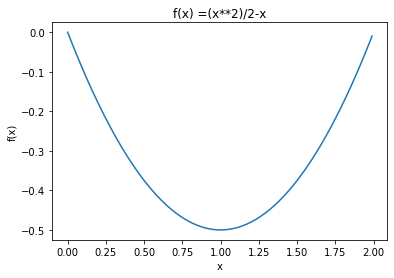

In [7]:
plt.title('f(x) =(x**2)/2-x')
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

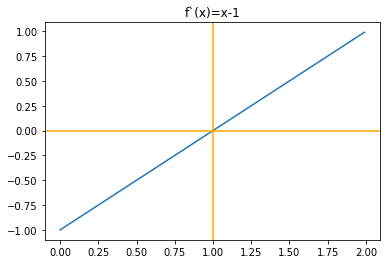

In [8]:
# 도함수 : 직선
plt.title('f`(x)=x-1')
plt.plot(x,df(x))
plt.axhline(y=0,color='orange') #도함수가 x=1일때 0이 됨 -> x=1일 때 최소값 존재
plt.axvline(x=1,color='orange')
plt.show()

In [9]:
golden_section_search(f,0)

init: (a:0.0000, b:0.0100) (ya:0.0000 yb:-0.0100)
step: (a:0.0000, b:0.0100, c:0.0200) (ya:0.0000, yb:-0.0100 yc:-0.0198)
step: (a:0.0100, b:0.0200, c:0.0400) (ya:-0.0100, yb:-0.0198 yc:-0.0392)
step: (a:0.0200, b:0.0400, c:0.0800) (ya:-0.0198, yb:-0.0392 yc:-0.0768)
step: (a:0.0400, b:0.0800, c:0.1600) (ya:-0.0392, yb:-0.0768 yc:-0.1472)
step: (a:0.0800, b:0.1600, c:0.3200) (ya:-0.0768, yb:-0.1472 yc:-0.2688)
step: (a:0.1600, b:0.3200, c:0.6400) (ya:-0.1472, yb:-0.2688 yc:-0.4352)
step: (a:0.3200, b:0.6400, c:1.2800) (ya:-0.2688, yb:-0.4352 yc:-0.4608)
step: (a:0.6400, b:1.2800, c:2.5600) (ya:-0.4352, yb:-0.4608 yc:0.7168)
init:(a:0.6400, b:2.5600)
1:(a:0.6400, b:1.8266)
2:(a:0.6400, b:1.3734)
3:(a:0.6400, b:1.0933)
4:(a:0.8131, b:1.0933)
5:(a:0.9201, b:1.0933)
6:(a:0.9201, b:1.0271)
7:(a:0.9610, b:1.0271)
8:(a:0.9863, b:1.0271)
9:(a:0.9863, b:1.0115)
10:(a:0.9959, b:1.0115)
11:(a:0.9959, b:1.0055)
12:(a:0.9959, b:1.0019)
13:(a:0.9982, b:1.0019)
14:(a:0.9982, b:1.0005)
15:(a:0.9990, b

(0.9999999426899366, -0.49999999999999833)

## What is convex combination?

![convex_combination](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F99BAE5375DA96F47238558)
![convex_combination_formula](https://t1.daumcdn.net/cfile/tistory/99F23C335DA96FDF02)
  
  
  
- convex combination은 위 식을 만족하는 점 p들을 말한다.
- 즉, 주어진 지점을 서로 연결한 도형 안에 존재하는 지점들

# 이분법

In [10]:
# Algorithm 3.7 :p.50

def bracket_sign_change(df,a,b,k=2): 
    #df는 목적함수(x), 도함수(o) , a와 b는 가까운 값, k는 하이퍼 파라미터(width를 늘려나가는 비율)
    # a,b,k값이 초모수, 하이퍼 파라미터
    
    if a>b:
        a,b=b,a
        
    center,half_width = 0.5*(b+a), 0.5*(b-a)
    
    while df(a)*df(b)>0:
        
        half_width*=k
        
        a=center-half_width
        b=center+half_width
        
    return (a,b)


bracket_sign_change(df,0,0.1) #비교적 가까운 0과 0.1
# 도함수가 0이되는 근이 포함되어 있다고 생각하는 구간
# 또는 목적함수 f의 최소값이 포함되어있다고 생각하는 feasible set
# 이 구간 내 도함수 0이 되는 근 찾기 --> 최적화 문제!!

(-1.55, 1.6500000000000001)

In [11]:
# Algorithm 3.6 : p.50

def bisection(df,x,epsilon=1E-6): 
    # 목적함수가 아닌 도함수 들어가야함!, 
    # 이분법에 의해 찾아진 구간 길이가 epsilon보다 작으면 반복 멈춘다
    # x는 bracket_sing_change를 a,b를 결정하기 위해 임의로 지정해줌
    
    a,b=bracket_sign_change(df,x-epsilon,x+epsilon)
    print('init:(a:%.4f, b:%.4f)'%(a,b)) #feasible set지정
    
    ya,yb=df(a),df(b)
    
    if ya==0:
        b=a
    if yb==0:
        a=b
        
    i=1
    while b-a > epsilon: #b-a는 구간의 길이: b가 항상 a보다 크니까
        x=0.5*(a+b)
        y=df(x)
        
        if y==0:
            a,b=x,x
        elif y*ya>0: #두 도함수의 부호가 같다 -> a점을 x로 이동
            a=x
        else: #그렇지 않으면 b를 x로 이동
            b=x
            
        print('step %d -a:%.4f, b:%.4f, y:%.4f, ya:%.4f' %(i,a,b,y,ya))
        
        i+=1
        
        x=0.5*(a+b)
        y=df(x)
        
    return x,y
        
bisection(df,0) #직관적이지만 확인해야할 것 많음
# x=1에서 도함수의 값이 0이 됨 파악

# bisection은 15번 계산 --> 더 좋음...?
# bisection이 최적화에서 계산 어려운 경우 존재
# 최적화를 위한 목적함수의 도함수를 알기 어려운 경우 bisection계산 불가

# 일반적으로 최적화에 적용 어려움
# 최적화 문제보다는 주어진 함수에 근을 찾는 문제에 더 적절함

init:(a:-1.0486, b:1.0486)
step 1 -a:0.0000, b:1.0486, y:-1.0000, ya:-2.0486
step 2 -a:0.5243, b:1.0486, y:-0.4757, ya:-2.0486
step 3 -a:0.7864, b:1.0486, y:-0.2136, ya:-2.0486
step 4 -a:0.9175, b:1.0486, y:-0.0825, ya:-2.0486
step 5 -a:0.9830, b:1.0486, y:-0.0170, ya:-2.0486
step 6 -a:0.9830, b:1.0158, y:0.0158, ya:-2.0486
step 7 -a:0.9994, b:1.0158, y:-0.0006, ya:-2.0486
step 8 -a:0.9994, b:1.0076, y:0.0076, ya:-2.0486
step 9 -a:0.9994, b:1.0035, y:0.0035, ya:-2.0486
step 10 -a:0.9994, b:1.0015, y:0.0015, ya:-2.0486
step 11 -a:0.9994, b:1.0004, y:0.0004, ya:-2.0486
step 12 -a:0.9999, b:1.0004, y:-0.0001, ya:-2.0486
step 13 -a:0.9999, b:1.0002, y:0.0002, ya:-2.0486
step 14 -a:0.9999, b:1.0001, y:0.0001, ya:-2.0486
step 15 -a:1.0000, b:1.0000, y:0.0000, ya:-2.0486


(1.0, 0.0)